## Final Project Submission

Please fill out:
* Student name: Bede Marcos Sahlu
* Student pace: Self paced
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL: 


# Microsoft Entry to Films

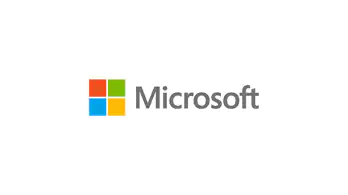

## Business Understanding

Original content creation is an opportunity that has offered breakthrough to individuals and big companies alike. The problem is that only a few of the films being created have a return that make it worthwhile to be longstanding in the industry. Our client, Microsoft, has identified this and would like to understand not only how to enter this field, but also make an effective mark on it. In this report, we analyze relevant data to provide insights on what films are doing their best and why. We will translate our findings into actionable recommendations on what films we believe should be made going forward for Microsoft Executives.

## Data Understanding

I've collected two datasets that I believe can identify great opportunities for Microsoft. The first dataset is "bom.movie_gross.csv.gz" and the second is "im.db.zip". We'll go more in depth as we go through these datasets but in brief:
   - "bom.movie_gross.csv.gz" includes:
        - movies and their financials both domestically and foreign
   - "im.db.zip" includes
        - detialed view of movies including actors, genres and rating
        
These datasets gives us very different looks into movies which can prove beneficial for analytical purposes. If both were just financial, our insight would have been very limited.

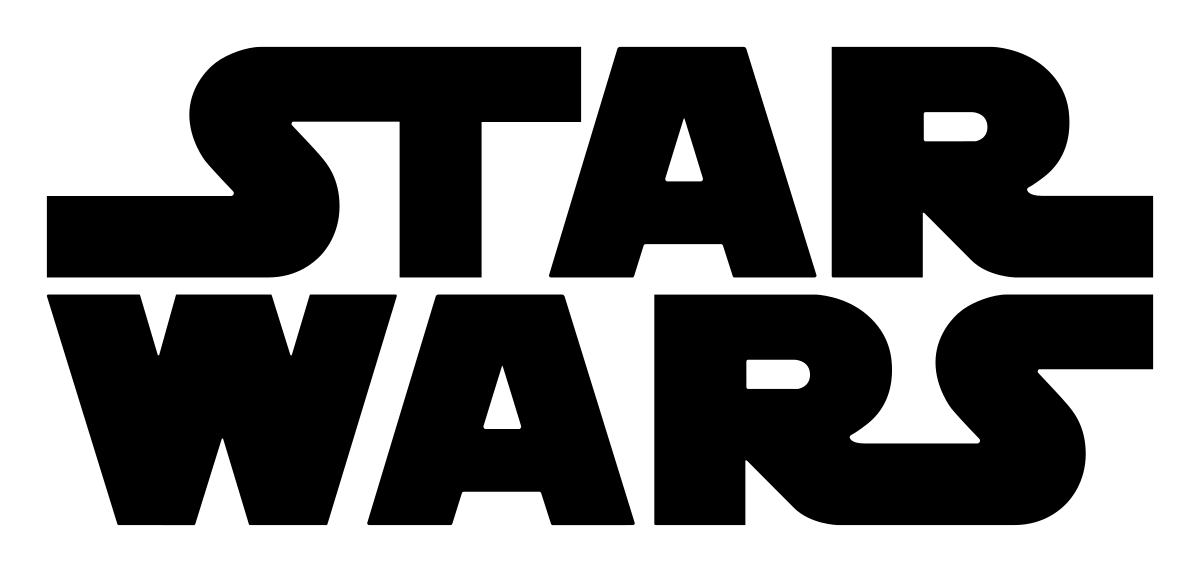
**Highest Grossing Movie

# Dataset #1  
1. bom.movie_gross.csv.gz
    - CSV file with 5 columns and 3387 rows
    - This file is relevant with helping us solve our problem because it contains financials and release year for movies. 

## Phase 1: Extracting Data and Read Files

clearly explain what data we'll be using and what we'll use to examine these datas.

### Access Data with Pandas
We've been provided with a dataset that we need to access. We'll use the pandas library to achieve this. 
#### Pandas: 
is a library used for data analysis. Lets us manipulate the data set provided and is more powerful and efficient than using python. 

In [577]:
import pandas as pd

In [578]:
# import our first file bom.movie_gross.csv.gz and 
# save it using a method provided to us by pandas
df = pd.read_csv('zippedData/bom.movie_gross.csv.gz')

# info method provides us with basic information on our data.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [579]:
# this tells us that our dataframe has 3387 rows and 5 columns
df.shape

(3387, 5)

## Phase 2: Examining Data and Cleaning Data
- DF has some missing information. 
    - "Foreign_gross" column. It's missing 1350 rows with data. 
        - #### Solution: We'll let the data remain because studios may not have launched their movie anywhere else but domestically. Specailly for performance reasons financially. Instead of removing, for analysis purposes, we'll change 'NAN' to 0.
        
    - "Studio" column. It has 5 rows with missing data. 
        - #### Solution: The best solution is keep these rows as not knowing the studio won't affect our overall goal for this project. Replacing them can cause problems as the abbreviations used in the "studios" column might create a mix up.
    - "Domestic_gross" column. 28 rows with data that's N/A
        - #### Solution: After examining the data, I've decided to leave the column as is because these movies may not have any data in the domestic column but do have data for the foreign field.

In [580]:
# the foreign_gross column has 1350 rows with missing data
df['foreign_gross'].isna().sum()

1350

In [581]:
df.isnull().sum()

title                0
studio               5
domestic_gross      28
foreign_gross     1350
year                 0
dtype: int64

In [582]:
# Before moving onto cleaning data, we need to 
# understand what type of data we're dealing with.
df.dtypes

title              object
studio             object
domestic_gross    float64
foreign_gross      object
year                int64
dtype: object

In [583]:
# domestic_gross column with missing values.
df[df['domestic_gross'].isna()].head()

,title,studio,domestic_gross,foreign_gross,year
230,It's a Wonderful Afterlife,UTV,NaN,1300000,2010
298,Celine: Through the Eyes of the World,Sony,NaN,119000,2010
302,White Lion,Scre.,NaN,99600,2010
306,Badmaash Company,Yash,NaN,64400,2010
327,Aashayein (Wishes),Relbig.,NaN,3800,2010


### Normalize Foreign & Domestic Gross and Studio Names

Prior to exploring the Data, we need to normalize the studio names to all capital and no spaces and we need to normalize foreign gross by replacing NaN to 0 and converting everything to a float for better analysis.


In [584]:
# data['Name'].str.upper()
df['studio'] = df['studio'].str.upper()
df['studio'] = df['studio'].str.strip()

In [585]:
df.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [586]:
# I would like to convert everything into a float but some strings contain commas and periods so that 
# will cause an error
# before achieving this: we also need to take care of empty cells in this column as that will also throw an error

# This makes all 'NaN' to string 0
df['foreign_gross'] = df['foreign_gross'].fillna('0')
 

In [587]:
df['foreign_gross'] = df['foreign_gross'].apply(lambda x: float(x.split()[0].replace(',', '')))

In [588]:
# succesfull conversion
df['foreign_gross'].dtype

dtype('float64')

In [589]:
df['domestic_gross'] = df['domestic_gross'].fillna(0)

In [590]:
# no more missing data, but we have to keep in mind this step when applying statistics
df['foreign_gross'].isna().sum()

0

In [591]:
# Our data now looks very different from the beginning. Minimal 'NaN' and datatypes are easier to explore
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3387 non-null   float64
 3   foreign_gross   3387 non-null   float64
 4   year            3387 non-null   int64  
dtypes: float64(2), int64(1), object(2)
memory usage: 132.4+ KB


### This process has helped me identify one more issue, duplicates.

In [592]:
# This tells us that there a movie that is duplicated at least based on title
len(df['title'].unique())

3386

## Phase 3: Explore and Analyze Dataset

In [593]:
# Describe is a method that provides us with statistal desciption of our numeric columns in our
# dataframe. We also have the option to inlude booleans and objects for more.
df.describe().round(0)

# we have to keep in mind the 0's we included

,domestic_gross,foreign_gross,year
count,3387.0,3387.0,3387.0
mean,28508206.0,45029795.0,2014.0
std,66755749.0,112684346.0,2.0
min,0.0,0.0,2010.0
25%,111500.0,0.0,2012.0
50%,1300000.0,1500000.0,2014.0
75%,27500000.0,29150000.0,2016.0
max,936700000.0,960500000.0,2018.0


In [594]:
df['domestic_gross'].sum()

96557293580.0

In [595]:
# This piece of data is facinating. With 1350 rows filled to 0, foreign gross total outweighs domestic by in large.
df['foreign_gross'].sum()

152515914276.5

#### Sort Values
Sorting values by order and column that we need. In this case, it has revealed one key piece of insight.
- The reason I'm sorting this data is because it helps us answer our stakeholders question: what movies are performing well and why?
    - Sorting gives us insight on what movies performed well financially. Do they have anything in common? Yes

In [596]:
top_domestic_gross = df.sort_values(by=['domestic_gross'], ascending=False).head()
top_domestic_gross

,title,studio,domestic_gross,foreign_gross,year
1872,Star Wars: The Force Awakens,BV,936700000.0,1131.6,2015
3080,Black Panther,BV,700100000.0,646900000.0,2018
3079,Avengers: Infinity War,BV,678800000.0,1369.5,2018
1873,Jurassic World,UNI.,652300000.0,1019.4,2015
727,Marvel's The Avengers,BV,623400000.0,895500000.0,2012


In [597]:
top_foreign_gross = df.sort_values(by=['foreign_gross'], ascending=False).head()
top_foreign_gross

,title,studio,domestic_gross,foreign_gross,year
328,Harry Potter and the Deathly Hallows Part 2,WB,381000000.0,960500000.0,2011
1875,Avengers: Age of Ultron,BV,459000000.0,946400000.0,2015
727,Marvel's The Avengers,BV,623400000.0,895500000.0,2012
3081,Jurassic World: Fallen Kingdom,UNI.,417700000.0,891800000.0,2018
1127,Frozen,BV,400700000.0,875700000.0,2013


# Insight #1
- All of the movies that based on the dataset above have returned the best gross amounts revolve around "Universes".
- Both foreign and domestic results showcase the idea: movies around universes return a large gross amount.

Now lets looks at when we combine both the domestic and foreign gross

In [598]:
# Create a new column called 'total_gross' that is the sum of foreign and domestic gross columns
df['total_gross'] = df['domestic_gross'] + df['foreign_gross']

In [599]:
# This shows us the top 50 total grossing movies.
top_grossing = df.sort_values('total_gross', ascending=False).head(50).round()

In [902]:
top_grossing

,title,studio,domestic_gross,foreign_gross,year,total_gross
727,Marvel's The Avengers,BV,623400000.0,895500000.0,2012,1.518900e+09
1875,Avengers: Age of Ultron,BV,459000000.0,946400000.0,2015,1.405400e+09
3080,Black Panther,BV,700100000.0,646900000.0,2018,1.347000e+09
328,Harry Potter and the Deathly Hallows Part 2,WB,381000000.0,960500000.0,2011,1.341500e+09
2758,Star Wars: The Last Jedi,BV,620200000.0,712400000.0,2017,1.332600e+09
3081,Jurassic World: Fallen Kingdom,UNI.,417700000.0,891800000.0,2018,1.309500e+09
1127,Frozen,BV,400700000.0,875700000.0,2013,1.276400e+09
2759,Beauty and the Beast (2017),BV,504000000.0,759500000.0,2017,1.263500e+09
3082,Incredibles 2,BV,608600000.0,634200000.0,2018,1.242800e+09
1128,Iron Man 3,BV,409000000.0,805800000.0,2013,1.214800e+09


## This confirms our insight.
## Best performing movies financially are built around "Universes".

In [277]:
# Matplotlib forms basis for visualization in Python
import matplotlib.pyplot as plt

<AxesSubplot:>

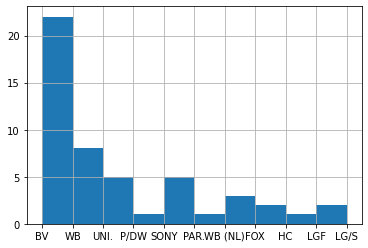

In [283]:
# it's very clear that 'BV' studio has many projects that have performed well. 
top_grossing['studio'].hist()

Text(0, 0.5, 'Money in Billions')

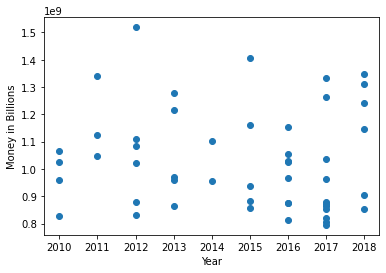

In [908]:
# The year the movie was made gives us no correlation with the total_gross but some movies were 
# in the same universe
plt.scatter(top_grossing["year"], top_grossing["total_gross"])
plt.xlabel("Year")
plt.ylabel("Money in Billions")

# Dataset #2 
    2. "im.db.zip" includes
        - This dataset is in a zipped folder. We'll need to unzip this file 
        - We'll process this file by using SQL 

## Phase 1: Extracting Data and Read Files

clearly explain what data we'll be using and what we'll use to examine these datas.

### Unzip Dataset #2

In [309]:
! ls

CONTRIBUTING.md     awesome.gif         movie_data_erd.jpeg
LICENSE.md          data.sqlite         student.ipynb
README.md           im.db               zippedData


In [324]:
# zipfile is a module used to perform simple tasks on a zipped file
from zipfile import ZipFile

# I'll also import sqlite3 because that the file type we'll use 
import sqlite3

In [325]:
# ZipFile() function to read file and the extractall() function to
# decompress or unzip the zip file and save its contents to a directory called data/raw

with ZipFile("zippedData/im.db.zip","r") as f:
    f.extractall('data/raw')

In [326]:
! ls

CONTRIBUTING.md     awesome.gif         movie_data_erd.jpeg
LICENSE.md          data                student.ipynb
README.md           data.sqlite         zippedData


In [335]:
# we use our sqlite3 module to connect with our database
conn = sqlite3.connect('data/raw/im.db')

# cursor is an object where our SQL commands are available
cur = conn.cursor()

In [339]:
# Check if we have gained access to our database
cur.execute("""SELECT name FROM sqlite_master WHERE type = 'table';""")
cur.fetchall()

[('movie_basics',),
 ('directors',),
 ('known_for',),
 ('movie_akas',),
 ('movie_ratings',),
 ('persons',),
 ('principals',),
 ('writers',)]

- We know that we 8 tables based on our above response
- We're using cur at this point to make sure we're connected but we'll begin implementing pandas from this point forward

In [344]:
# same result but using Pandas library and read_sql method
sql_df = pd.read_sql("""SELECT name FROM sqlite_master WHERE type = 'table';""", conn)
sql_df

,name
0,movie_basics
1,directors
2,known_for
3,movie_akas
4,movie_ratings
5,persons
6,principals
7,writers


## Phase 2: Examining Data and Cleaning Data
- There are 8 Tables. 
    - #### Movie Basics = (146144, 6) and has data missing on a few columns
        - This will be our starting point. Contains the most useful information for our clients goal.
        - Contains most of the Titles and people that were associated with this movie
    - #### Persons = (606648, 5) also has a lot of data missing
        - This will be another table that'll serve useful for our clients goal. Provides us with name
            and professions. Most of the missing data will not be admissable for our work
    - #### Movie_ratings = (73856, 3) no data missing 
        - This is the second most important table. Gives us the opportunity to understand a movies 
            performance based on the number of votes

In [392]:
# after going through all the data, it's clear that the main table is 'movie_basics' and 'movie_id' is the 
# primary and foreign key connecting most of the tables together

movie_basics = pd.read_sql("SELECT * FROM movie_basics;", conn)
movie_basics.head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [393]:
# gather the basic info on the table
movie_basics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   movie_id         146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


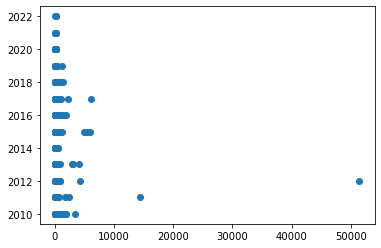

In [397]:
# After looking through our runtime column, it's clear that there are some outliers.
# A movie with 100,000 to a movie with 500,000 minutes.
plt.scatter(movie_basics["runtime_minutes"], movie_basics["start_year"])

In [426]:
# after examining the data further, I've decided that the runtime_minutes column
# should not be considered as part of the final dataset for analysis. There are to many anamolies.

pd.read_sql("""
SELECT runtime_minutes FROM movie_basics
    WHERE runtime_minutes < 3;
""", conn)

,runtime_minutes
0,1.0
1,2.0
2,1.0
3,2.0
4,2.0
...,...
56,2.0
57,2.0
58,2.0
59,1.0


### After examining the schema, I've identified a way to analyze this data with our clients goal in mind.

## Examine Movies based on Rating

In [899]:
movies = pd.read_sql("""
SELECT 
    mb.movie_id, mb.original_title as title, 
    mb.start_year, mb.genres, mr.numvotes, 
    mr.averagerating
    
    FROM movie_basics AS mb
    JOIN movie_ratings AS mr
        ON mr.movie_id = mb.movie_id
    ORDER by numvotes DESC
    LIMIT 100
""", conn)

In [721]:
# based on our above query, we've joined our ratings table and 
# kept the movies that only have ratings. We Got the Top 100.
movies

,movie_id,title,start_year,genres,numvotes,averagerating
0,tt1375666,Inception,2010,"Action,Adventure,Sci-Fi",1841066,8.8
1,tt1345836,The Dark Knight Rises,2012,"Action,Thriller",1387769,8.4
2,tt0816692,Interstellar,2014,"Adventure,Drama,Sci-Fi",1299334,8.6
3,tt1853728,Django Unchained,2012,"Drama,Western",1211405,8.4
4,tt0848228,The Avengers,2012,"Action,Adventure,Sci-Fi",1183655,8.1
...,...,...,...,...,...,...
95,tt0470752,Ex Machina,2014,"Drama,Mystery,Sci-Fi",424542,7.7
96,tt1659337,The Perks of Being a Wallflower,2012,Drama,422671,8.0
97,tt1800241,American Hustle,2013,"Crime,Drama",418221,7.2
98,tt2872718,Nightcrawler,2014,"Crime,Drama,Thriller",404476,7.9


In [906]:
movies.describe().round()

,start_year,numvotes,averagerating
count,100.0,100.0,100.0
mean,2013.0,606521.0,8.0
std,2.0,224779.0,1.0
min,2010.0,403755.0,6.0
25%,2012.0,471573.0,7.0
50%,2013.0,540167.0,8.0
75%,2015.0,659666.0,8.0
max,2019.0,1841066.0,9.0


# Insight #2
## As part of Insight #1, a lot of the items mentioned on this top 100 list were also mentioned on our first dataset.

    - We use this opportunity to combine these two data sets and out of the top 100 rated in dataset #1 and top 100 total grossing in dataset #2, we got 18 that match based on title.
    - Movies that have performed well financially and in terms of ratings with high number of votes mostly revlove around UNIVERSES.
    

In [617]:
top_movies = pd.merge(top_grossing.head(100), movies, on='title')

In [909]:
top_movies

,title,studio,domestic_gross,foreign_gross,year,total_gross,movie_id,start_year,genres,numvotes,averagerating
0,Avengers: Age of Ultron,BV,459000000.0,946400000.0,2015,1.405400e+09,tt2395427,2015,"Action,Adventure,Sci-Fi",665594,7.3
1,Black Panther,BV,700100000.0,646900000.0,2018,1.347000e+09,tt1825683,2018,"Action,Adventure,Sci-Fi",516148,7.3
2,Frozen,BV,400700000.0,875700000.0,2013,1.276400e+09,tt2294629,2013,"Adventure,Animation,Comedy",516998,7.5
3,Captain America: Civil War,BV,408100000.0,745200000.0,2016,1.153300e+09,tt3498820,2016,"Action,Adventure,Sci-Fi",583507,7.8
4,Skyfall,SONY,304400000.0,804200000.0,2012,1.108600e+09,tt1074638,2012,"Action,Adventure,Thriller",592221,7.8
5,The Dark Knight Rises,WB,448100000.0,636800000.0,2012,1.084900e+09,tt1345836,2012,"Action,Thriller",1387769,8.4
6,Toy Story 3,BV,415000000.0,652000000.0,2010,1.067000e+09,tt0435761,2010,"Adventure,Animation,Comedy",682218,8.3
7,Pirates of the Caribbean: On Stranger Tides,BV,241100000.0,804600000.0,2011,1.045700e+09,tt1298650,2011,"Action,Adventure,Fantasy",447624,6.6
8,The Hobbit: An Unexpected Journey,WB (NL),303000000.0,718100000.0,2012,1.021100e+09,tt0903624,2012,"Adventure,Family,Fantasy",719629,7.9
9,The Hobbit: The Desolation of Smaug,WB (NL),258399999.0,700000000.0,2013,9.584000e+08,tt1170358,2013,"Adventure,Fantasy",565563,7.8


In [628]:
top_movies.describe().round()

,domestic_gross,foreign_gross,year,total_gross,start_year,numvotes,averagerating
count,19.0,19.0,19.0,1.900000e+01,19.0,19.0,19.0
mean,370994737.0,643121053.0,2014.0,1.014116e+09,2014.0,659223.0,8.0
std,104266424.0,150416841.0,3.0,1.795770e+08,3.0,354314.0,1.0
min,241100000.0,409300000.0,2010.0,8.219000e+08,2010.0,426302.0,6.0
25%,303700000.0,537300000.0,2012.0,8.643500e+08,2012.0,485261.0,7.0
50%,356500000.0,646900000.0,2014.0,9.584000e+08,2014.0,565563.0,8.0
75%,413800000.0,731650000.0,2016.0,1.096750e+09,2016.0,628908.0,8.0
max,700100000.0,946400000.0,2018.0,1.405400e+09,2018.0,1841066.0,9.0


Text(0, 0.5, 'Gross in Billions')

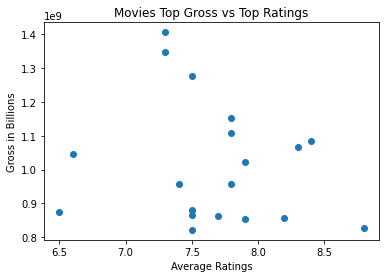

In [903]:
plt.scatter(top_movies["averagerating"], top_movies["total_gross"])
plt.title("Movies Top Gross vs Top Ratings")
plt.xlabel('Average Ratings')
plt.ylabel('Gross in Billions')

### At this stage, we're going to focus on the "Directors" table to understand how a director may influence a rating
    - When reviewing the directors table, it's clear that there are a lot of rows that are repeated so I clear that using the DISTINCT keyword available in SQL
    - We get all the directors and the movies they worked on
    - We GROUP the directors and their work and the average rating and total count of projects they've worked on to see if there is any correlation between they're work and the performance.

# Examine Directors Table
- This Table of directors was not clean because of repetitive movies and directors so
    we've used DISTINCT to remove any duplicate data

In [781]:
# My goal here is to find the directors that have a movie and rating. 
# I want to match that with their financial performance

directors = pd.read_sql("""
SELECT DISTINCT
    person_id, pr.primary_name as director, 
    pr.primary_profession AS profession, mb.movie_id, 
    avg(mr.averagerating) AS aveRating, 
    COUNT(DISTINCT mb.movie_id) AS numOfProjects,
    SUM(mr.numvotes) AS totalVotes
    FROM directors
    JOIN persons AS pr USING(person_id)
    JOIN movie_basics AS mb USING(movie_id)
    JOIN movie_ratings AS mr
        ON mr.movie_id = mb.movie_id
    GROUP BY director
    ORDER BY averagerating DESC
""", conn)

In [782]:
# We have gathered the amount of projects that these directors have created 
# with the average rating they've received for their movies
directors

,person_id,director,profession,movie_id,aveRating,numOfProjects,totalVotes
0,nm6925060,Tristan David Luciotti,"actor,writer,producer",tt5344358,10.000000,1,6
1,nm3388005,Stephen Peek,"producer,camera_department,cinematographer",tt9715646,10.000000,1,20
2,nm0880350,Mohamed Ulad-Mohand,"producer,director,writer",tt2632430,8.800000,2,15
3,nm3704168,Michiel Brongers,"director,writer",tt6295832,10.000000,1,5
4,nm4637768,Masahiro Hayakawa,"director,producer",tt5390098,10.000000,1,5
...,...,...,...,...,...,...,...
56737,nm0400194,Brent Huff,"actor,director,writer",tt1932655,5.777778,5,1660
56738,nm5590847,Ayumu Hasegawa,"director,writer",tt4280842,1.000000,1,630
56739,nm3580935,Aliakbar Campwala,"director,writer,producer",tt1932655,1.000000,2,694
56740,nm4923072,Akihiro Mima,"director,writer",tt2124890,1.000000,1,1756


### INITIALLY:
- I HAD JUST MATCHED UP TO SEE THE DIRECTORS WITH THE TOP MOVIES TO SEE WHO THEY ARE, BUT THAT DID NOT RESULT IN ANY
    USEFUL INFORMATION. 
  - I THEN DECIDED TO GROUP ALL OF THE DIRECTORS WORKS WITH THE RATINGS OF ALL THEIR WORK
  - THEN I MERGED THE DIRECTORS "AVERAGE" RATING FOR ALL OF HIS/HER WORK AND THIS WAS THE RESULT.
  
* THE GOAL IS TO SEE IF THESE DIRECTORS HAVE MORE PROJECTS AND THEIR OVERALL PERFORMANCE

In [900]:
movie_directors = pd.merge(top_movies, directors, on="movie_id")
movie_directors

,title,studio,domestic_gross,foreign_gross,year,total_gross,movie_id,start_year,genres,numvotes,averagerating,person_id,director,profession,aveRating,numOfProjects,totalVotes
0,Avengers: Age of Ultron,BV,459000000.0,946400000.0,2015,1.405400e+09,tt2395427,2015,"Action,Adventure,Sci-Fi",665594,7.3,nm0923736,Joss Whedon,"writer,producer,director",7.455556,3,5726110
1,Frozen,BV,400700000.0,875700000.0,2013,1.276400e+09,tt2294629,2013,"Adventure,Animation,Comedy",516998,7.5,nm1601644,Jennifer Lee,"writer,miscellaneous,producer",7.500000,1,2067992
2,Frozen,BV,400700000.0,875700000.0,2013,1.276400e+09,tt2294629,2013,"Adventure,Animation,Comedy",516998,7.5,nm0118333,Chris Buck,"animation_department,director,writer",7.500000,1,2067992
3,Captain America: Civil War,BV,408100000.0,745200000.0,2016,1.153300e+09,tt3498820,2016,"Action,Adventure,Sci-Fi",583507,7.8,nm0751648,Joe Russo,"producer,director,writer",8.180645,5,18421688
4,Captain America: Civil War,BV,408100000.0,745200000.0,2016,1.153300e+09,tt3498820,2016,"Action,Adventure,Sci-Fi",583507,7.8,nm0751577,Anthony Russo,"producer,director,writer",8.246667,4,18421593
5,Skyfall,SONY,304400000.0,804200000.0,2012,1.108600e+09,tt1074638,2012,"Action,Adventure,Thriller",592221,7.8,nm0005222,Sam Mendes,"producer,director,miscellaneous",7.244444,2,4131404
6,The Dark Knight Rises,WB,448100000.0,636800000.0,2012,1.084900e+09,tt1345836,2012,"Action,Thriller",1387769,8.4,nm0634240,Christopher Nolan,"writer,producer,director",8.437500,4,10457390
7,Pirates of the Caribbean: On Stranger Tides,BV,241100000.0,804600000.0,2011,1.045700e+09,tt1298650,2011,"Action,Adventure,Fantasy",447624,6.6,nm0551128,Rob Marshall,"director,miscellaneous,producer",6.660000,3,2570109
8,The Hobbit: The Battle of the Five Armies,WB (NL),255100000.0,700900000.0,2014,9.560000e+08,tt2310332,2014,"Adventure,Fantasy",438621,7.4,nm0001392,Peter Jackson,"producer,director,writer",7.743750,4,8634677
9,Inside Out,BV,356500000.0,501100000.0,2015,8.576000e+08,tt2096673,2015,"Adventure,Animation,Comedy",536181,8.2,nm0215455,Ronnie Del Carmen,"art_department,animation_department,miscellaneous",8.200000,1,4289448


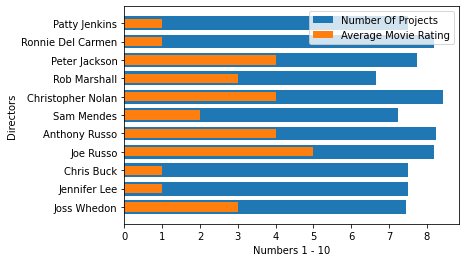

In [898]:
# plt.plot(movie_directors['director', 'aveRating'])
x = movie_directors["director"]
y1 = movie_directors["aveRating"]
y2 = movie_directors['numOfProjects']

plt.barh(x,y1, .75)
plt.barh(x,y2, .50)
plt.ylabel('Directors')
plt.xlabel('Numbers 1 - 10')
plt.legend({'Average Movie Rating','Number Of Projects'})


# Insight #3
    - As we continue to build off of our Financial Performance and Ratings of movies:
        - DIRECTORS: who we've been able to match with the top performing movies also have a high average rating on AT LEAST 1 movie that they've made

In [697]:
movie_basics = pd.read_sql("SELECT * FROM movie_basics;", conn)
movie_basics.head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
